In [118]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

full = pd.read_csv('C:/Users/HOU/Documents/practical_bundle/origin/sugisakaya48de1-4.csv')
label= pd.read_csv('C:/Users/HOU/Documents/practical_bundle/origin/keyf0713.csv')

full = preprocessing.scale(full)
full[:3]
full = preprocessing.normalize(full, norm='l2')
#scaler = MinMaxScaler(feature_range=(0, 1))
#full = scaler.fit_transform(full.values)
#full[:3]

C:\Users\HOU\Anaconda3\envs\tensorflow_gpu\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [119]:
list=[]
n=0
for i in range(int(full.shape[0]/24)):
    for j in range(label.shape[0]):
        if (i)*0.5 <label.values[j] and ((i+1)*0.5)>label.values[j]:
            n=n+1
            print(i,i*0.5,(i+1)*0.5,label.values[j])
            list.append(i)
            break;
    
            
data=[]
labels=[]
n=0
for i in range(int(full.shape[0]/24)):
    if i in list:
        data.append(full[i*24:(i+1)*24])
        labels.append(1)
    else:
        data.append(full[i*24:(i+1)*24])
        labels.append(0) 

0 0.0 0.5 [0.26]
3 1.5 2.0 [1.64]
4 2.0 2.5 [2.27]
7 3.5 4.0 [3.53]
8 4.0 4.5 [4.04]
11 5.5 6.0 [5.96]
12 6.0 6.5 [6.44]
13 6.5 7.0 [6.755]
16 8.0 8.5 [8.36]
24 12.0 12.5 [12.185]
31 15.5 16.0 [15.62]
36 18.0 18.5 [18.29]
38 19.0 19.5 [19.145]
39 19.5 20.0 [19.895]
40 20.0 20.5 [20.06]
41 20.5 21.0 [20.855]
42 21.0 21.5 [21.44]
43 21.5 22.0 [21.86]
45 22.5 23.0 [22.82]
48 24.0 24.5 [24.425]
51 25.5 26.0 [25.7]
52 26.0 26.5 [26.33]
54 27.0 27.5 [27.02]
55 27.5 28.0 [27.86]
56 28.0 28.5 [28.49]
57 28.5 29.0 [28.91]
61 30.5 31.0 [30.515]
64 32.0 32.5 [32.27]
72 36.0 36.5 [36.095]
78 39.0 39.5 [39.05]
79 39.5 40.0 [39.53]
80 40.0 40.5 [40.445]
81 40.5 41.0 [40.865]
82 41.0 41.5 [41.435]
83 41.5 42.0 [41.855]
84 42.0 42.5 [42.035]
85 42.5 43.0 [42.725]
86 43.0 43.5 [43.355]
87 43.5 44.0 [43.805]
88 44.0 44.5 [44.06]
90 45.0 45.5 [45.08]
91 45.5 46.0 [45.53]
92 46.0 46.5 [46.22]
95 47.5 48.0 [47.885]
96 48.0 48.5 [48.365]
98 49.0 49.5 [49.055]
99 49.5 50.0 [49.85]
105 52.5 53.0 [52.7]
107 53

[INFO] compiling model...
[INFO] training network...
Train on 295 samples, validate on 74 samples
Epoch 1/30
295/295 [==============================] - 6s 19ms/step - loss: 3.7120 - acc: 0.4746 - val_loss: 6.3696 - val_acc: 0.5946
Epoch 2/30
295/295 [==============================] - 2s 5ms/step - loss: 2.6803 - acc: 0.6949 - val_loss: 5.0083 - val_acc: 0.6622
Epoch 3/30
295/295 [==============================] - 2s 5ms/step - loss: 1.6912 - acc: 0.6915 - val_loss: 3.9712 - val_acc: 0.6486
Epoch 4/30
295/295 [==============================] - 2s 5ms/step - loss: 1.2672 - acc: 0.7288 - val_loss: 2.6088 - val_acc: 0.7973
Epoch 5/30
295/295 [==============================] - 2s 5ms/step - loss: 1.3453 - acc: 0.7593 - val_loss: 3.5374 - val_acc: 0.7162
Epoch 6/30
295/295 [==============================] - 2s 5ms/step - loss: 1.7375 - acc: 0.7356 - val_loss: 2.0022 - val_acc: 0.8243
Epoch 7/30
295/295 [==============================] - 2s 6ms/step - loss: 1.1819 - acc: 0.7356 - val_loss: 2.

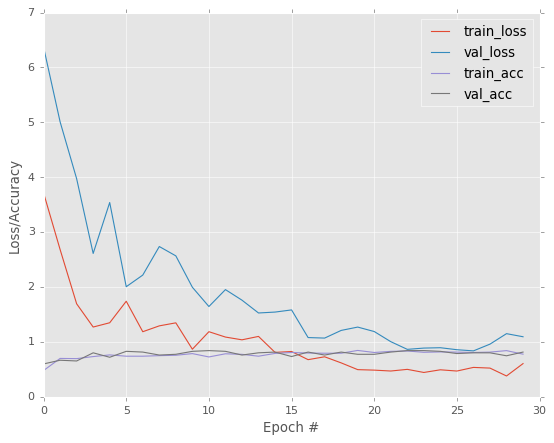

In [120]:
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from CV.nn.conv.MiniVGGNet import MiniVGGNet
from CV.nn.conv.alexnet import AlexNet
from CV.nn.conv.LeNet import LeNet
import numpy as np

data = np.array(data)

data = data.reshape(data.shape[0], 24, 24, 1)

(train_X, test_X, train_y, test_y) = train_test_split(data,
                               labels, test_size=.2,random_state=7)

import numpy as np
# train_X = np.array(train_X)
# train_y = np.array(train_y)
# test_X = np.array(test_X)
# test_y = np.array(test_y)

from keras.utils import to_categorical
lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)
lb.fit(train_y)
train_y=lb.transform(train_y)
test_y = lb.transform(test_y)
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)



EPOCHS = 30
INIT_LR = 1e-3
BS =128
# initialize the optimizer and model
print("[INFO] compiling model...")
#opt = SGD(lr=0.05, decay=0.05/EPOCHS, momentum=0.9,nesterov=True)
opt = Adam(lr=0.05, decay=0.05 / 30)
#opt = SGD(lr=0.005)
#opt = SGD(lr=0.05, decay=0.05/20, momentum=0.9,nesterov=True)
#model = MiniVGGNet.build(width=24, height=24, depth=1, classes=2)
model = MiniVGGNet.build(width=24, height=24, depth=1, classes=2)
#model = AlexNet.build(width=24, height=24, depth=1, classes=2)
model.compile(loss="categorical_crossentropy", optimizer=opt,#binary_crossentropy#categorical_crossentropy
metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(train_X, train_y,validation_data=(test_X, test_y),
    batch_size=BS, epochs=EPOCHS, verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_X, batch_size=BS)
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

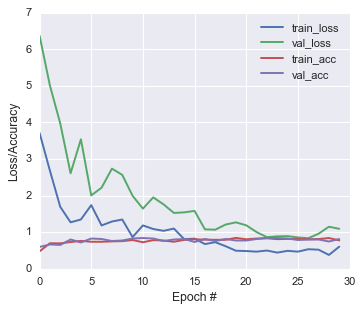

In [129]:
plt.style.use("seaborn")
plt.figure(figsize=(5,4))
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

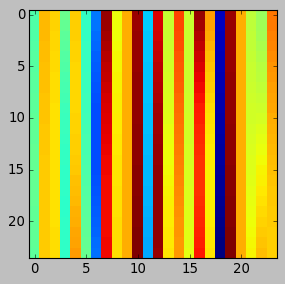

In [135]:
plt.style.use("classic")
plt.figure(figsize=(4,4))
plt.imshow(full[0:24], interpolation='nearest')
plt.show()

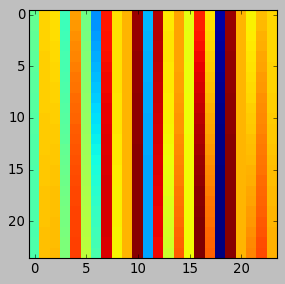

In [136]:
plt.figure(figsize=(4,4))
plt.imshow(full[24:48], interpolation='nearest')#cmap ='gray'
plt.show()

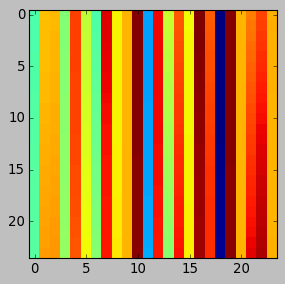

In [137]:
plt.figure(figsize=(4,4))
plt.imshow(full[48:72], interpolation='nearest')
plt.show()

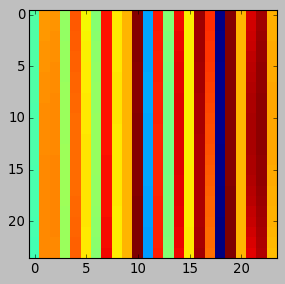

In [138]:
plt.figure(figsize=(4,4))
plt.imshow(full[72:96], interpolation='nearest')
plt.show()

In [45]:
for i in range(int(full.shape[0]/24)):
    for j in range(label.shape[0]):
        if (i)*0.5 <label.values[j] and ((i+1)*0.5)>label.values[j]:
            n=n+1
            print(i,i*0.5,(i+1)*0.5,label.values[j])
            print( i)
            break;

0 0.0 0.5 [0.26]
0
3 1.5 2.0 [1.64]
3
4 2.0 2.5 [2.27]
4
7 3.5 4.0 [3.53]
7
8 4.0 4.5 [4.04]
8
11 5.5 6.0 [5.96]
11
12 6.0 6.5 [6.44]
12
13 6.5 7.0 [6.755]
13
16 8.0 8.5 [8.36]
16
24 12.0 12.5 [12.185]
24
31 15.5 16.0 [15.62]
31
36 18.0 18.5 [18.29]
36
38 19.0 19.5 [19.145]
38
39 19.5 20.0 [19.895]
39
40 20.0 20.5 [20.06]
40
41 20.5 21.0 [20.855]
41
42 21.0 21.5 [21.44]
42
43 21.5 22.0 [21.86]
43
45 22.5 23.0 [22.82]
45
48 24.0 24.5 [24.425]
48
51 25.5 26.0 [25.7]
51
52 26.0 26.5 [26.33]
52
54 27.0 27.5 [27.02]
54
55 27.5 28.0 [27.86]
55
56 28.0 28.5 [28.49]
56
57 28.5 29.0 [28.91]
57
61 30.5 31.0 [30.515]
61
64 32.0 32.5 [32.27]
64
72 36.0 36.5 [36.095]
72
78 39.0 39.5 [39.05]
78
79 39.5 40.0 [39.53]
79
80 40.0 40.5 [40.445]
80
81 40.5 41.0 [40.865]
81
82 41.0 41.5 [41.435]
82
83 41.5 42.0 [41.855]
83
84 42.0 42.5 [42.035]
84
85 42.5 43.0 [42.725]
85
86 43.0 43.5 [43.355]
86
87 43.5 44.0 [43.805]
87
88 44.0 44.5 [44.06]
88
90 45.0 45.5 [45.08]
90
91 45.5 46.0 [45.53]
91
92 46.0 46.5 [

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
activation_91 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_76 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_92 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0         
__________

In [74]:
dict([(layer.name, layer) for layer in model.layers[1:]])

{'activation_91': <keras.layers.core.Activation at 0x1f1021d8f60>,
 'batch_normalization_76': <keras.layers.normalization.BatchNormalization at 0x1f1021d8fd0>,
 'conv2d_62': <keras.layers.convolutional.Conv2D at 0x1f0c11b7b38>,
 'activation_92': <keras.layers.core.Activation at 0x1f0cd66d358>,
 'batch_normalization_77': <keras.layers.normalization.BatchNormalization at 0x1f0cd6539e8>,
 'max_pooling2d_16': <keras.layers.pooling.MaxPooling2D at 0x1f0cd6530f0>,
 'dropout_46': <keras.layers.core.Dropout at 0x1f0cd6aac18>,
 'conv2d_63': <keras.layers.convolutional.Conv2D at 0x1f0cd70ddd8>,
 'activation_93': <keras.layers.core.Activation at 0x1f0cd741240>,
 'batch_normalization_78': <keras.layers.normalization.BatchNormalization at 0x1f0fb56a390>,
 'conv2d_64': <keras.layers.convolutional.Conv2D at 0x1f0fb59dd68>,
 'activation_94': <keras.layers.core.Activation at 0x1f10236de48>,
 'batch_normalization_79': <keras.layers.normalization.BatchNormalization at 0x1f102351940>,
 'dropout_47': <kera

In [75]:
'''Visualization of the filters of VGG16, via gradient ascent in input space.
This script can run on CPU in a few minutes.
Results example: http://i.imgur.com/4nj4KjN.jpg
'''
from __future__ import print_function

from scipy.misc import imsave
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

# dimensions of the generated pictures for each filter.
img_width = 24
img_height = 24

# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'conv2d_64'

# util function to convert a tensor into a valid image


def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# build the VGG16 network with ImageNet weights
print('Model loaded.')

model.summary()

# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


kept_filters = []
for filter_index in range(200):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 20 + 24
    

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))

Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 24, 24, 32)        320       
_________________________________________________________________
activation_91 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_76 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_92 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_77 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 32)        0      

ValueError: Cannot feed value of shape (1, 24, 24, 3) for Tensor 'conv2d_61_input:0', which has shape '(?, 24, 24, 1)'